# Color Threshold, Green Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [55]:
# Read in the image
image_original = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image_original.shape)

# copy image
image = np.copy(image_original)

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Image dimensions: (450, 660, 3)


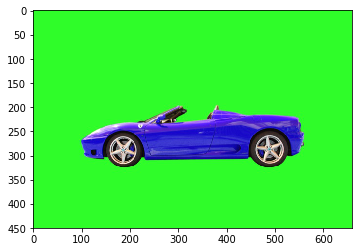

In [56]:
# Display the image
plt.imshow(image)

In [57]:
print(image[10][10])
print(image[0][0])

[ 47 253  41]
[ 47 253  41]


### Define the color threshold

In [58]:
## TODO: Define our color selection boundaries in RGB values
lower_green = np.array([0,135,0]) 
upper_green = np.array([60,255,60])


### Create a mask

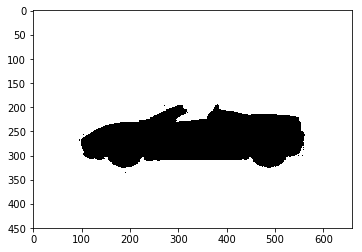

In [59]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

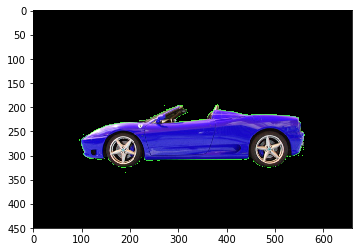

In [60]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

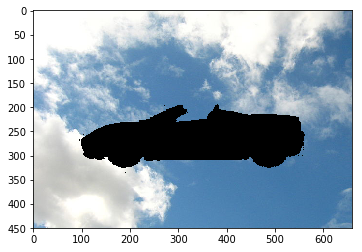

In [63]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')
# background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

## TODO: Crop it or resize the background to be the right size (450x660)
crop_background = np.copy(background_image[0:450, 0: 660])

## TODO: Mask the cropped background so that the CAR area is blocked
# Hint mask the opposite area of the previous image
crop_background[mask == 0] = [0, 0, 0]

## TODO: Display the background and make sure 
plt.imshow(crop_background)

### Create a complete image

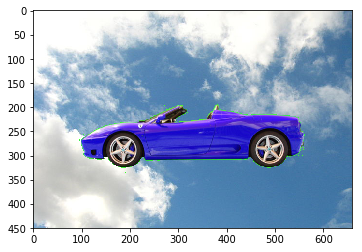

In [64]:
## TODO: Add the two images together to create a complete image!
complete_image = crop_background + masked_image

# TODO: Display the result
plt.imshow(complete_image)



## Solutions for TODOs

#### Define our color selection boundaries in RGB values
lower_green = np.array([0,240,0]) 

#### Load in a background image, and convert it to RGB 
background_image = mpimg.imread('<file_name>')
background_image = mpimg.cvtColor(background_image, cv2.COLOR_BGR2RGB)

#### Crop it to the right size (450x660)
crop_background = background_image[0:450, 0:660]

#### Mask the cropped background so that the image area is blocked
crop_background[mask == 0] = [0, 0, 0]

#### Display the background
plt.imshow(crop_background)

#### Add the two images together to create a complete image!
complete_image = masked_image + crop_background

#### Display the result
plt.imshow(complete_image)